# Simple linear regression 

### Importing the libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

### Importing the dataset

In [22]:
#select file data
file_path = r'C:\Users\Administrator\Downloads\Project\BCSMASS\BCSMASS 2010-2023.xlsx'
dataset = pd.read_excel(file_path)

### selecting the input and output column

In [23]:
columns_to_impute = ['BCSMASS 2011', 'BCSMASS 2012', 'BCSMASS 2013', 'BCSMASS 2014',
                 'BCSMASS 2015', 'BCSMASS 2016', 'BCSMASS 2017', 'BCSMASS 2018', 'BCSMASS 2019', 'BCSMASS 2020',
                     ]

output_cols = 'BCSMASS 2021'

### Dependent and independent variables

In [25]:
X = dataset[columns_to_impute].values
y = dataset[output_cols].values

### Normalizing x for y

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

### Training and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

### using the simple linear regression model

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### the training and test set predictions

In [29]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

### Checking the model result for training set

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
Train_R_squared = r2_score(y_train, train_predictions)
Train_MSR = mean_squared_error(y_train, train_predictions)
Train_MAE = mean_absolute_error(y_train, train_predictions)

In [31]:
print ('Train_R-squared score', Train_R_squared)
print ('Train_Mean squared error', Train_MSR)
print ('Train_Mean absolute error', Train_MAE)

Train_R-squared score 0.5042760909712178
Train_Mean squared error 0.004462009909594616
Train_Mean absolute error 0.04251893876266007


### checking the model result for test set

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
Test_R_squared = r2_score(y_test, test_predictions)
Test_MSR = mean_squared_error(y_test, test_predictions)
Test_MAE = mean_absolute_error(y_test, test_predictions)

In [33]:
print ('Test_R-squared score', Test_R_squared)
print ('Test_Mean squared error', Test_MSR)
print ('Test_Mean absolute error', Test_MAE)

Test_R-squared score 0.5231428487744382
Test_Mean squared error 0.0037309925030148006
Test_Mean absolute error 0.039895895766949616


### Visualising the Random Forest Regression results (higher resolution)

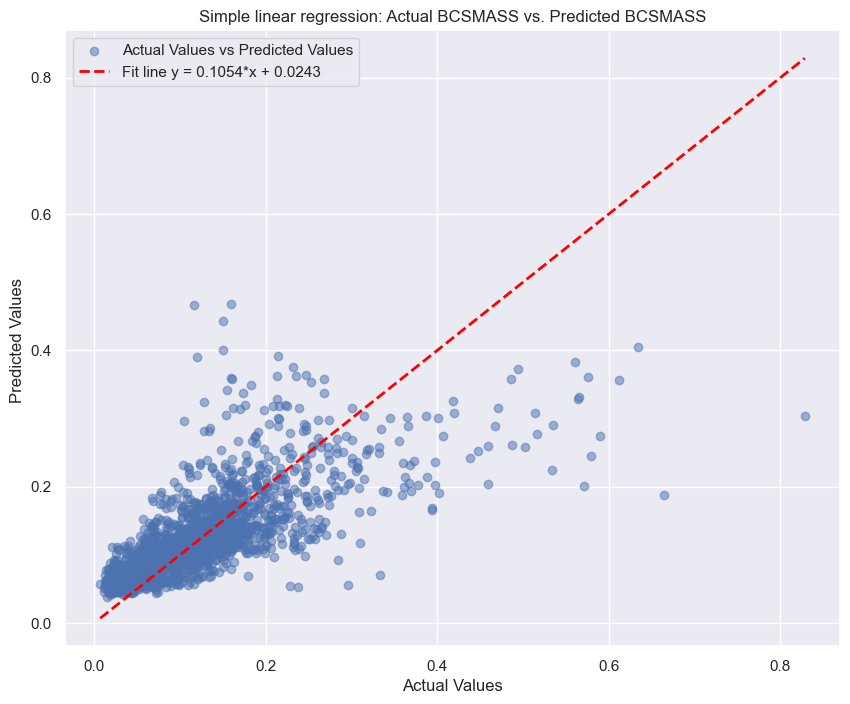

In [34]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test, test_predictions, alpha=0.5, label = 'Actual Values vs Predicted Values')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         linestyle='--', color='red', linewidth=2, label = 'Fit line y = 0.1054*x + 0.0243')

plt.title('Simple linear regression: Actual BCSMASS vs. Predicted BCSMASS')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values ')
plt.legend()
plt.show()